<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-programming/blob/main/Ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

**[런타임] -> [런타임 다시시작]**

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [2]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

### 02. 파이토치의 기본 기능

## 2.2 텐서

파이토치에서 연산 대상 데이터는 모두 '텐서(Tensor)'라고 하는 파이토치 고유의 형식으로 되어 있어야 한다.

### 라이브러리 임포트

In [3]:
# 파이토치 라이브러리

import torch

### 다양한 계수의 텐서 만들기

In [4]:
# 0계 텐서(스칼라)
r0 = torch.tensor(1.0).float()

## 텐서 변수가 생성될 때는 반드시 뒤에 float 함수를 호출해서, dtype을 강제로 float32(32비트 부동소수점)으로 변환해야 한다. 이 처리를 잊어버리면 dtype은 float64가 되고, 'nn.Linear'와 같은 부분에서 에러를 발생시킨다.

# type 확인
print(type(r0))

# dtype 확인
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [5]:
## shape 확인
print(r0.shape)

# 데이터 확인
print(r0.data)

torch.Size([])
tensor(1.)


텐서 변수는 단지 수치에 지나지 않고, 여러 역할을 가진다.  
순수하게 수치만 얻고 싶을 때는 data 속성을 이용하면 된다.

In [6]:
# 1계 텐서(벡터)

# 1계 넘파이 변수 작성
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

# 넘파이에서 텐서로 변환
r1 = torch.tensor(r1_np).float()

# dtype 확인
print(r1.dtype)

# shape 확인
print(r1.shape)

# 데이터 확인
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [7]:
# 2계 텐서(행렬)

# 2계 넘파이 변수 작성
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

# 넘파이에서 텐서로 변환
r2 = torch.tensor(r2_np).float()

# shape 확인
print(r2.shape)

# 데이터 확인
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [8]:
# ３계 텐서

# 난수 seed 초기화
torch.manual_seed(123)

# shape=[3,2,2]의 정규분포 텐서 작성
r3 = torch.randn((3, 2, 2))

# shape 확인
print(r3.shape)

# 데이터 확인
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [9]:
# 4계 텐서

# 요소가 모두 1인 shape=[2,3,2,2] 텐서 작성
r4 = torch.ones((2, 3, 2, 2))

# shape 확인
print(r4.shape)

# 데이터 확인
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


### 정숫값을 갖는 텐서 만들기

파이토치의 대부분의 계산은 부동소수점 수치형(dtype=float32)을 사용한다.  
그러나 한 가지 예외는, '다중 분류'에서 사용하는 손실함수인 nn.CrossEntropyLoss와 nn.NLLLoss는 손실함수를 호출할 때, 두번째 인수로 정수 타입을 지정해야 한다.

In [10]:
r5 = r1.long()

# dtype 확인
print(r5.dtype)

# 값 확인
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


### view 함수

In [11]:
# 2계화
# 남은 자리에 -1을 지정하면 이 수를 자동으로 조정함

r6 = r3.view(3, -1)

# shape 확인
print(r6.shape)

# 값 확인
print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [12]:
# 1계화
# 남은 자리에 -1을 지정하면 이 수를 자동으로 조정함

r7 = r3.view(-1)

# shape 확인
print(r7.shape)

# 값 확인
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


### 그 밖의 속성

In [13]:
# requires_grad 속성
print('requires_grad: ', r1.requires_grad)

# device 속성
print('device: ', r1.device)

## requires_grad 속성은 자동 미분 기능과, device 속성은 GPU 계산과 관련이 있다.

requires_grad:  False
device:  cpu


### item 함수

In [14]:
# 스칼라 텐서(0계 텐서)는 item 함수로 값을 꺼낼 수 있음
## 텐서로 이뤄진 loss 계산 결과(손실)에서 데이터 기록을 위한 값을 추출하는 데 자주 사용된다

item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [15]:
# 스칼라 이외의 텐서에 item 함수는 무효함
## 1계 이상의 텐서는 대상이 아니다

print(r1.item())

RuntimeError: ignored

In [16]:
# 요소 수가 하나뿐인 1계 텐서는 OK
# (2계 이상에서도 마찬가지)
t1 = torch.ones(1)

# shape 확인
print(t1.shape)

# item 함수 호출
print(t1.item())

torch.Size([1])
1.0


### max 함수

In [17]:
# 텐서 r2 확인
print(r2)

# max 함수를 인수 없이 호출하면, 최댓값을 얻음
print(r2.max())

## 최솟값(min), 평균값(mean) 등의 함수도 같은 방식으로 사용한다

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [18]:
# torch.max 함수
# 두번째 인수는 기준이 되는 축을 의미함
print(torch.max(r2, 1))

## 대상이 2계 텐서인 경우, 축=1은 행 방향의 집계를, 축=0은 열 방향의 집계를 의미한다

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


### 넘파이 변수로 변환

In [19]:
# 넘파이로 변환
r2_np = r2.data.numpy()

# type 확인
print(type(r2_np))

# 값 확인
print(r2_np)

## 이 형태로 변수에 대입하면 텐서 변수와 넘파이 배열이 같은 데이터를 바라보기 때문에, 텐서 값을 바꾸면 넘파이 배열도 같이 값이 바뀌게 된다

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 2.3 자동 미분 기능

**![자동미분기능 그림]**

### (1) 경사 계산용 변수의 정의

경사(미분) 계산을 해야 하는 변수는 텐서 변수로 정의한다. 중요한 것은 requires_grad 속성을 True로 설정해야 한다는 점이다.

### (2) 텐서 변수 간의 계산

**Define by Run** 방식 : 계산식을 통해 값을 계산함과 동시에, 보이지 않는 다른 쪽에서 계산그래프가 생성된다.

### (3) 계산 그래프 시각화

make_dot 함수를 사용하면 step(2)에서 자동 생성한 계산 그래프를 시각화할 수 있다.

### (4) 경사 계산

경사 계산은 계산 결과를 저장한 텐서 변수(스칼라)에 backward 함수를 호춣해서 이뤄진다.

### (5) 경삿값 가져오기

경사 계산(수치 미분)의 결과는 파이토치에서 '경삿값'으로 불린다. 경삿값은 텐서 변수의 grad 속성으로 가져올 수 있다.

### (6) 경삿값의 초기화

grad 속성에 저장된 경삿값은 사용이 끝나면 값을 초기화 해야한다.  
초기화를 하기 위해 zero_ 함수를 사용한다.

## 2.4 2차 함수의 경사 계산

### (1) 경사 계산용 변수 정의

In [20]:
# x를 넘파이 배열로 정의
x_np = np.arange(-2, 2.1, 0.25)

# x값 표시
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [21]:
# (1) 경사 계산용 변수 정의

x = torch.tensor(x_np, requires_grad=True, 
    dtype=torch.float32)

# 결과 확인
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


### (2) 텐서 변수로 계산

In [22]:
# 2차 함수의 계산
# 계산 그래프는 내부에서 자동 생성됨

y = 2 * x**2 + 2

In [23]:
# y의 계산 결과 확인

print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


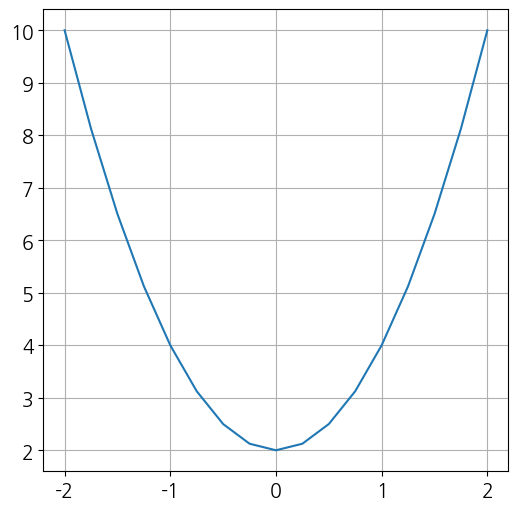

In [24]:
# 그래프(산포도) 출력

plt.plot(x.data, y.data)
plt.show()

## requires_grad 속싱이 True인 텐서 변수는 그 자체로는 matplotlib에서 사용할 수 없지만, data 속성을 넘겨주면 그래프로 표출할 수 있다.

In [25]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임

z = y.sum()

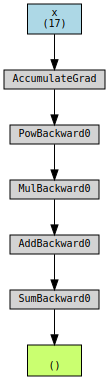

In [26]:
# (3) 계산 그래프 시각화

# 필요한 라이브러리 임포트
from torchviz import make_dot

# 시각화 함수 호출
g= make_dot(z, params={'x': x})
display(g)

make_dot 함수를 호출할 때, 첫번째 인수는 시각화하려는 계산 그래프의 대상이 될 변수(여기서는 z), 두번째 인수인 params로는 미분 계산 대상의 변수(여기서는 x)를 딕셔너리 형식의 파라미터 리스트로 넣어준다.

x를 텐서 변수가 아닌 넘파이 변수인 경우에도 완전히 같은 방법의 함수 호출(y=2*x**2 + 2, z=y.sum())로 인해 같은 계산 결과를 얻게 된다. 그러나 이 경우에는 출발점 x에서 어떤 계산을 통해 z를 얻었는지를 계산 결과 z와 x만으로 유추하기는 힘들다.

출발점 x를 텐서 변수로 하고, 동시에 requires_grad 그래프를 지정해 두면, 계산 과정이 자동적으로 기록된다. 따라서 z와 x만을 인수로, 그 과정을 시각화할 수 있는 것이다.  
이처럼 값을 계산해 나가며 계산 과정을 자동적으로 기록하는 기능을 일컬어 **'Define by Run'**이라 부른다.

맨 위의 하늘색 노드는 make_dot 함수의 호출시 params로 지정한 변수에 해당하고,**리프 노드**라고도 불린다. 경삿값의 계산이 가능한 변수를 의미한다. 맨 위와 맨 아래 노드에 기재된 (17)과 ()은 각 변수의 shape를 나타낸다. 맨 위 노드의 텐서 x는 1계 17차원 텐서이고, 맨 아래 노드는 0계, 즉 스칼라이다.

x의 바로 아래 AccumulateGrad는 마지막 단의 리프 노드의 바로 아래에 배치되어, 경삿값을 축적하는 위치를 나타낸다.

PowBackward0는 지수 함수의 호출이고, MulBackward0는 곱셈함수의 호출이다.  
마지막으로 y에서 스칼라 z를 만들기 위해 총합을 계산하는 sum 함수가 사용된다.

이처럼 최종적인 함수 값(z)을 계산하기 위해서, 어떤 종류의 함수가 어떤 순서로 호출되는지를 나타내는 것이 '계산 그래프'다.  
'계산 그래프'가 있으면, x값을 조금씩 움직였을 때, z값이 어떻게 변화하는지를 파이토치가 자동적으로 알려주게 된다. 이 원리를 사용해 수치 미분을 수행하는 것이, 'backward 함수를 통한 경사 계산'이다.

여기서 나타냈던 계산 그래프는, 2차함수 $f(x)=2x^2+2$가  지수함수, 곱셈함수, 더하기 함수들로 이뤄진 합성 함수로 인식해, 그 결과로부터 자동 생성된 것이다.

### (4) 경사 계산

In [27]:
# (4) 경사 계산

z.backward()

### (5) 경삿값 가져오기

In [28]:
# (5) 경삿값 가져오기

print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


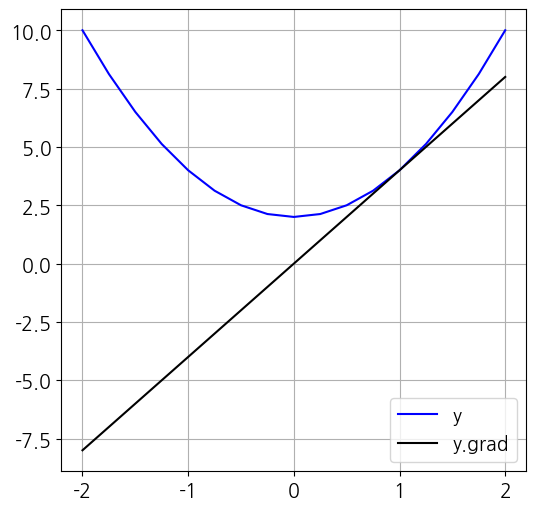

In [29]:
# 원래 함수와 경사 그래프

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

### (6) 경삿값의 초기화

In [30]:
# 경사를 초기화하지 않고 두번째 경사를 계산

y = 2 * x**2 + 2
z = y.sum()
z.backward()

# x의 경사 확인
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


In [31]:
# (6) 경삿값의 초기화는 zero_() 함수를 사용함

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## 2.5 시그모이드 함수의 경사 계싼

### (1) 시그모이드 함수의 정의

In [32]:
# 시그모이드 함수의 정의

sigmoid = torch.nn.Sigmoid()

### (2) 텐서 변수로 y값의 계산

In [33]:
# (2) y값의 계산

y = sigmoid(x)

### 그래프 출력

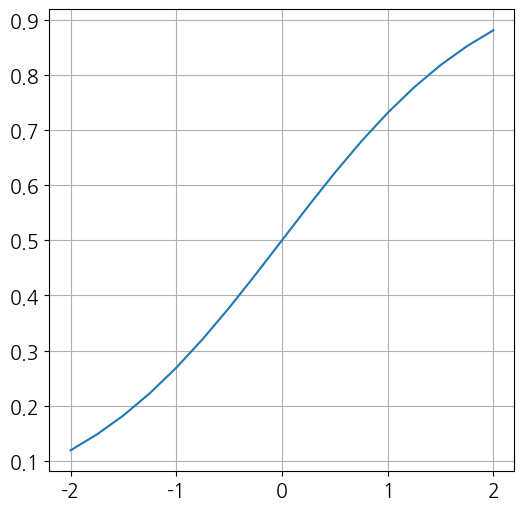

In [34]:
# 그래프(산포도) 출력

plt.plot(x.data, y.data)
plt.show()

### 최종 결과를 스칼라 값으로 변환

In [35]:
# 경사 계산을 위해 최종 값은 스칼라일 필요가 있으므로, 더미로 sum 함수를 붙임

z = y.sum()

### (3) 계산 그래프 시각화

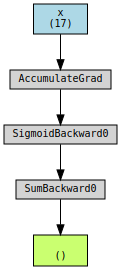

In [36]:
# (3) 계산 그래프 시각화

g = make_dot(z, params={'x': x})
display(g)

### (4) 경사 계산, (5) 경삿값 가져오기

In [37]:
# (4) 경사 계산
z.backward()

# (5) 경삿값 확인
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


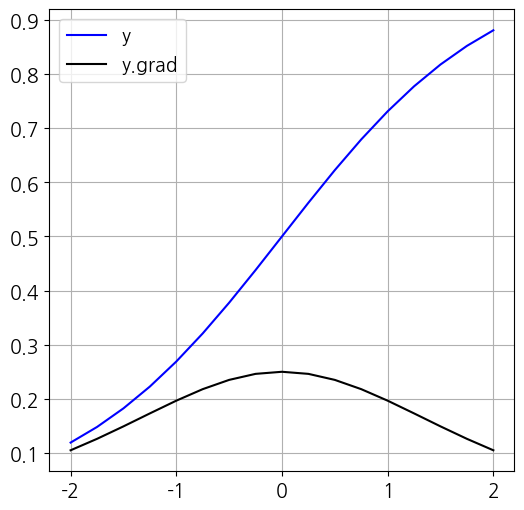

In [38]:
# 원래 함수와 경사 그래프

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

**텐서**  
이미지 데이터는 가로와 세로 2차원의 넓이를 가지므로, 최소 2계 이상, 그리고 컬러 이미지의 경우 RGB 각 채널마다 2차원 배열이 총 3장이 필요하다. 이 채널을 표기하려면 3계 이상이 필요하다.  
그리고 학습 데이터는 1장이 아닌 여러 장을 한번에 다뤄야 한다. 즉, 컬러 이미지에 서로 다른 데이터임을 표기해야 한다.  
이와 같은 이유로, 학습용 이미지 데이터는 4계 텐서(4개의 첨자를 갖는. $A_{ijkl}$)로 이해해야 한다.